In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file 'spotify2023.csv' into a DataFrame
# Specify encoding as 'latin1' to handle special characters correctly
df = pd.read_csv('spotify2023.csv',encoding='latin1')

## Data Familiatization

### How many rows and columns does the dataset contain?

In [5]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [9]:
# Display a summary of the DataFrame 'df', including the number of entries, non-null values, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Overview of Data Set

### What are the data types of each column?

In [10]:
# Convert the 'in_deezer_playlists' column to numeric type, coercing errors to NaN
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

# Convert the 'streams' column to numeric type, coercing errors to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Convert the 'in_shazam_charts' column to numeric type, coercing errors to NaN
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

# Print the data types of each column in the DataFrame to verify conversions
print(df.dtypes)

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object


### Are there any missing values and duplicated rows?

In [12]:
# Count the number of missing values (NaN) in each column of the DataFrame 'df'
missing_values_per_column = df.isna().sum()

# Print the total number of missing values in the entire DataFrame
# The first sum() counts NaNs per column, and the second sum() totals them
print(f"Missing values: {missing_values_per_column.sum()}")

Missing values: 232


In [13]:
# Check for duplicate rows in the DataFrame 'df' and count them
duplicate_count = df.duplicated().sum()

# Print the total number of duplicated rows in a formatted string
print(f"Duplicated values: {duplicate_count}")

Duplicated values: 0


## Basic Descriptive Statistics

### What are the mean, median, and standard deviation of the streams column?

In [16]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,874.000000,953.000000,896.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,109.740275,2.666317,51.176339,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,178.811406,6.035599,126.487856,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,12.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,36.500000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,110.000000,2.000000,36.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [17]:
# Present descriptive statistics for the 'streams' column
df['streams'].describe()

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64

### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

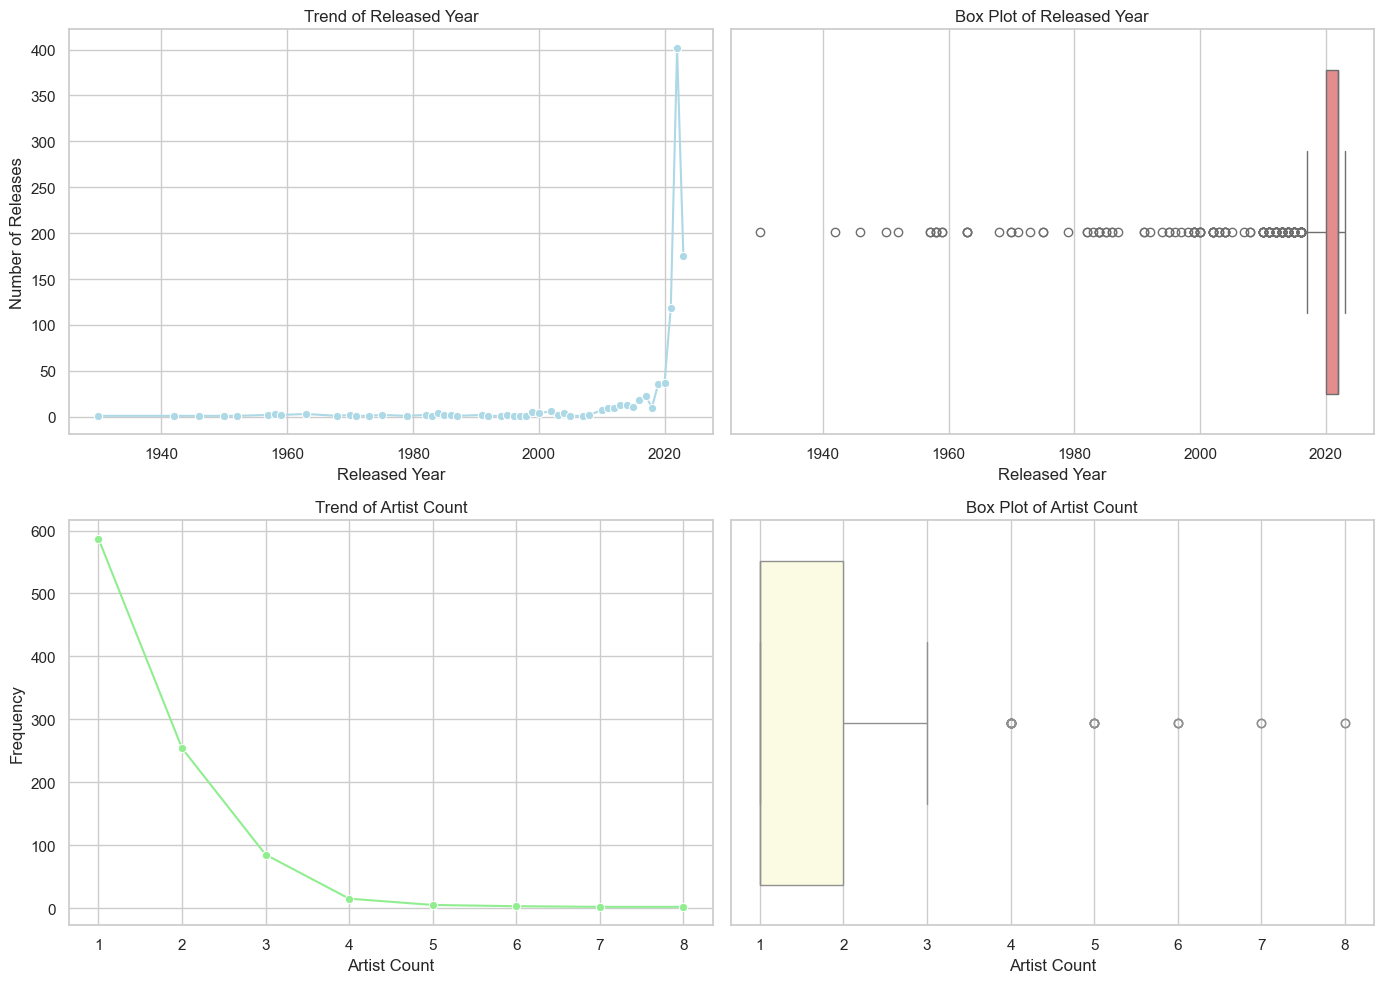

In [19]:
# Set the style for Seaborn
sns.set(style='whitegrid', palette='pastel')

# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Trend of released_year
released_year_counts = df['released_year'].value_counts().sort_index().reset_index()
released_year_counts.columns = ['released_year', 'count']

sns.lineplot(data=released_year_counts, x='released_year', y='count', ax=axes[0, 0], marker='o', color='lightblue')
axes[0, 0].set_title('Trend of Released Year')
axes[0, 0].set_xlabel('Released Year')
axes[0, 0].set_ylabel('Number of Releases')

# Box plot for outliers in released_year
sns.boxplot(x=df['released_year'], ax=axes[0, 1], orient='h', color='lightcoral')
axes[0, 1].set_title('Box Plot of Released Year')
axes[0, 1].set_xlabel('Released Year')

# Trend of artist_count
artist_count_counts = df['artist_count'].value_counts().sort_index().reset_index()
artist_count_counts.columns = ['artist_count', 'frequency']

sns.lineplot(data=artist_count_counts, x='artist_count', y='frequency', ax=axes[1, 0], marker='o', color='lightgreen')
axes[1, 0].set_title('Trend of Artist Count')
axes[1, 0].set_xlabel('Artist Count')
axes[1, 0].set_ylabel('Frequency')

# Box plot for outliers in artist_count
sns.boxplot(x=df['artist_count'], ax=axes[1, 1], orient='h', color='lightyellow')
axes[1, 1].set_title('Box Plot of Artist Count')
axes[1, 1].set_xlabel('Artist Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Top Performers

### Which track has the highest number of streams? Display the top 5 most streamed tracks.

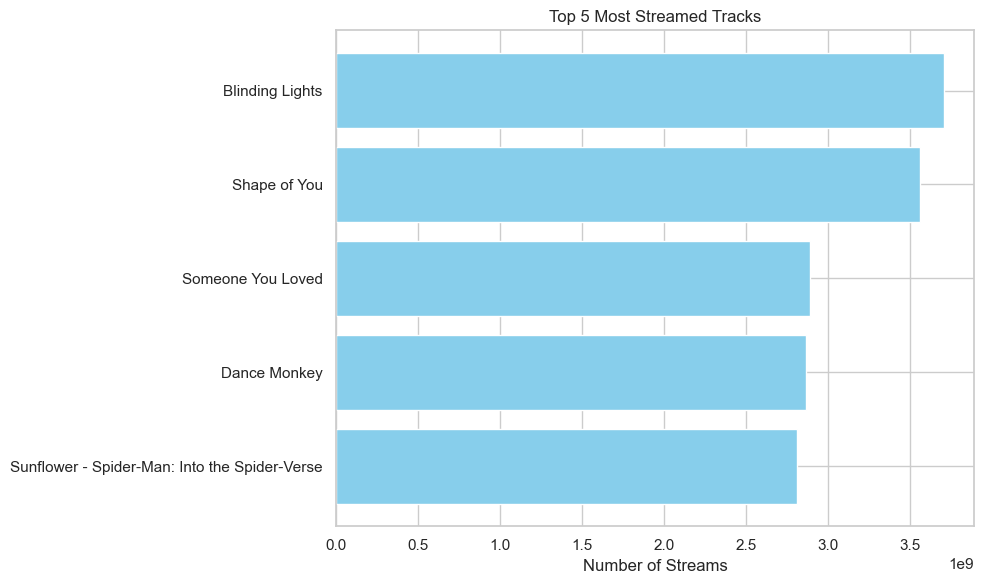

In [22]:
# Create a bar chart for the top 5 most streamed tracks
top_streamed_tracks = df[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
plt.barh(top_streamed_tracks['track_name'], top_streamed_tracks['streams'], color='skyblue')

# Set labels and title
plt.xlabel('Number of Streams')
plt.title('Top 5 Most Streamed Tracks')

# Invert y-axis to display the highest streams on top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

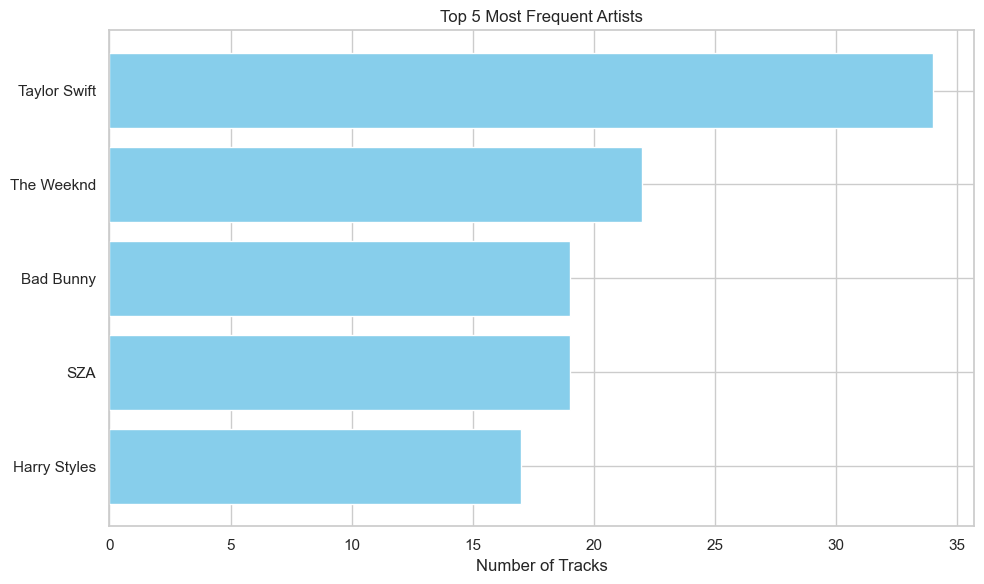

In [23]:
# Create a horizontal bar chart for the top 5 most frequent artists
top_artists = df['artist(s)_name'].value_counts().head(5)

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
plt.barh(top_artists.index, top_artists.values, color='skyblue')

# Set labels and title
plt.xlabel('Number of Tracks')
plt.title('Top 5 Most Frequent Artists')

# Invert y-axis to display the most frequent artists on top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Temporal Trends

### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

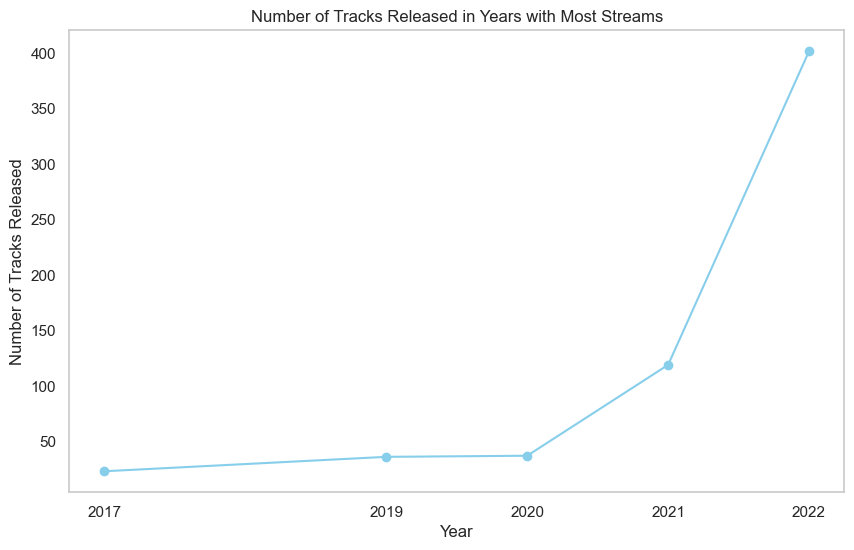

In [26]:
# Calculate total streams per year
streams_per_year = df.groupby('released_year')['streams'].sum()

# Identify the top years with the most streams
top_years = streams_per_year.nlargest(5).index  # Get the top 5 years

# Prepare data for plotting
tracks_per_year = df['released_year'].value_counts().sort_index()

# Filter tracks_per_year to only include top years
filtered_tracks_per_year = tracks_per_year[tracks_per_year.index.isin(top_years)]

# Plot the number of tracks released in top streamed years
plt.figure(figsize=(10, 6))
plt.plot(filtered_tracks_per_year.index, filtered_tracks_per_year.values, marker='o', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')
plt.title('Number of Tracks Released in Years with Most Streams')
plt.xticks(filtered_tracks_per_year.index)  # Show only top years on the x-axis
plt.grid()
plt.show()

### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

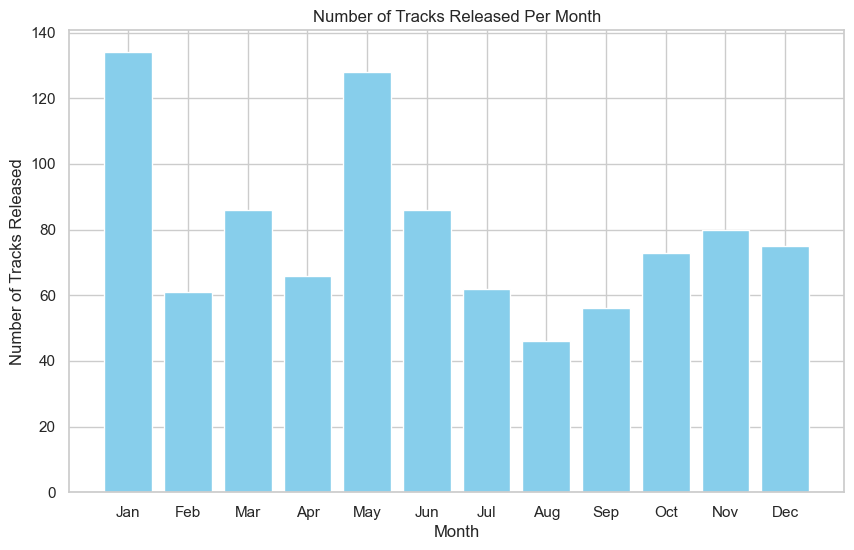

In [28]:
# Count the number of tracks released per month
tracks_per_month = df['released_month'].value_counts().sort_index()

# Identify the month with the most releases
most_releases_month = tracks_per_month.idxmax()
most_releases_count = tracks_per_month.max()

# Plot the number of tracks released per month
plt.figure(figsize=(10, 6))
plt.bar(tracks_per_month.index, tracks_per_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.title('Number of Tracks Released Per Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [29]:
# Create a mapping of month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Get the name of the month with the most releases
most_releases_month_name = month_names[most_releases_month]

print(f"\nThe month with the most releases is: {most_releases_month_name} with {most_releases_count} releases.")


The month with the most releases is: January with 134 releases.


## Genre and Music Characteristics

### Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

In [32]:
# Select relevant columns
attributes = ['streams', 'bpm', 'danceability_%', 'energy_%']
data = df[attributes]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation coefficients
print("Correlation Coefficients:")
print(correlation_matrix)

Correlation Coefficients:
                 streams       bpm  danceability_%  energy_%
streams         1.000000 -0.002438       -0.105457 -0.026051
bpm            -0.002438  1.000000       -0.147095  0.025794
danceability_% -0.105457 -0.147095        1.000000  0.198095
energy_%       -0.026051  0.025794        0.198095  1.000000


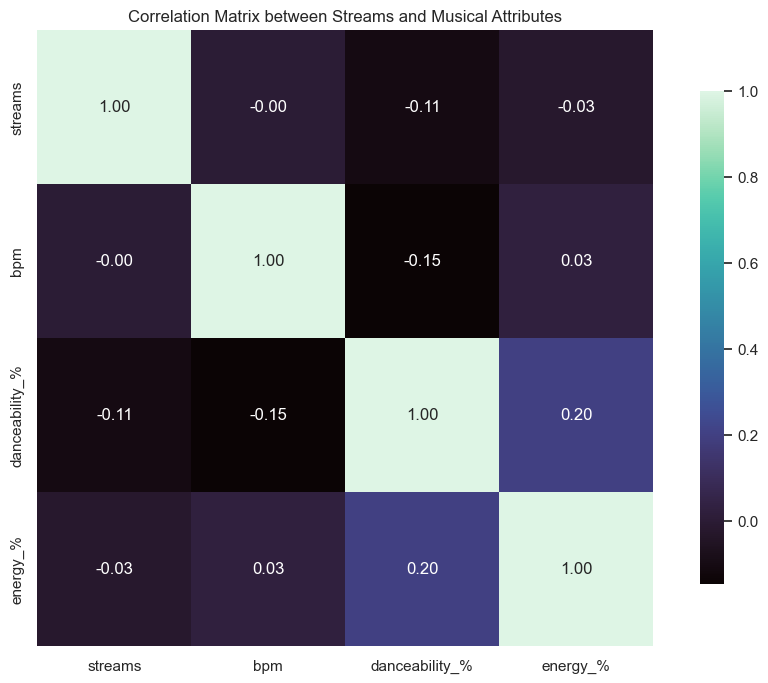

In [33]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f", square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix between Streams and Musical Attributes')
plt.show()

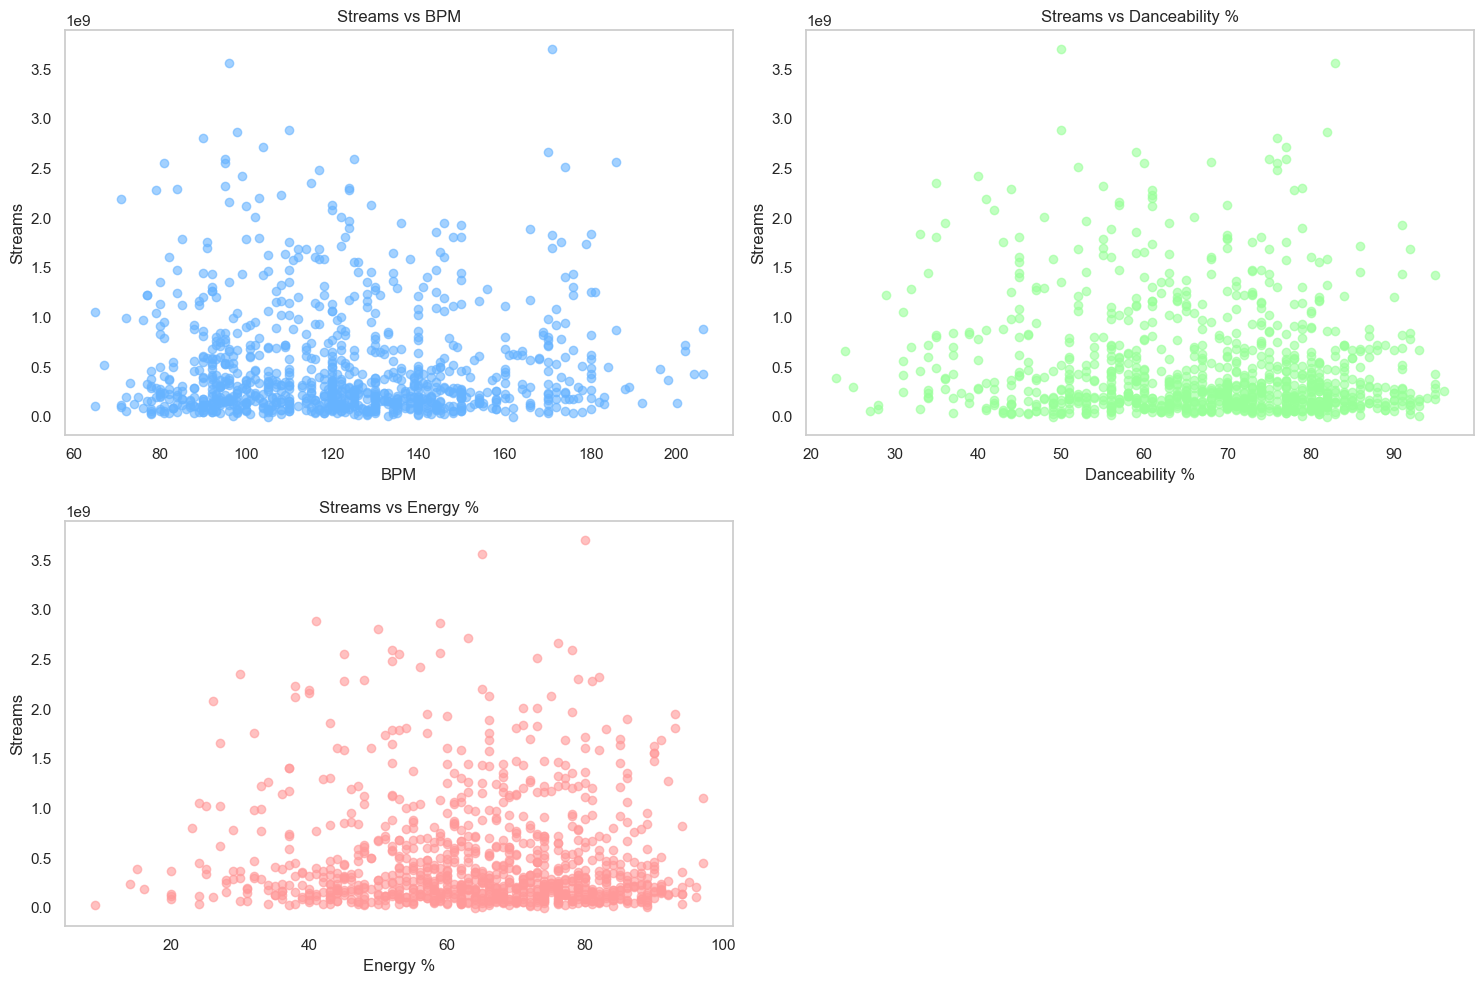

In [34]:
# Set up the figure for scatter plots
plt.figure(figsize=(15, 10))

# Scatter plot for Streams vs BPM
plt.subplot(2, 2, 1)  # Create a 2x2 grid, first subplot
plt.scatter(df['bpm'], df['streams'], alpha=0.6, color='#66b3ff')  # Pastel blue
plt.title('Streams vs BPM')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.grid()

# Scatter plot for Streams vs Danceability
plt.subplot(2, 2, 2)  # Second subplot
plt.scatter(df['danceability_%'], df['streams'], alpha=0.6, color='#99ff99')  # Pastel green
plt.title('Streams vs Danceability %')
plt.xlabel('Danceability %')
plt.ylabel('Streams')
plt.grid()

# Scatter plot for Streams vs Energy
plt.subplot(2, 2, 3)  # Third subplot
plt.scatter(df['energy_%'], df['streams'], alpha=0.6, color='#ff9999')  # Pastel red
plt.title('Streams vs Energy %')
plt.xlabel('Energy %')
plt.ylabel('Streams')
plt.grid()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

Correlation Matrix:
                danceability_%  energy_%  valence_%  acousticness_%
danceability_%        1.000000  0.198095   0.408451       -0.236165
energy_%              0.198095  1.000000   0.357612       -0.577344
valence_%             0.408451  0.357612   1.000000       -0.081907
acousticness_%       -0.236165 -0.577344  -0.081907        1.000000


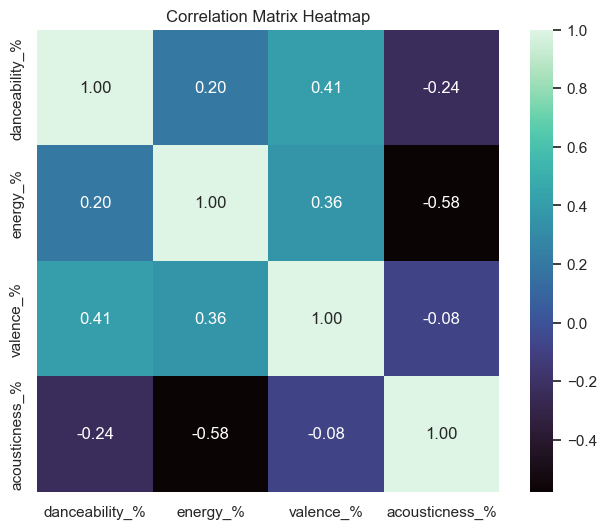

In [36]:
# Select relevant columns for analysis
features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']
data = df[features]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Platform Popularity

### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

Spotify        4955719.0
Apple Music      64625.0
Deezer           95913.0
dtype: float64


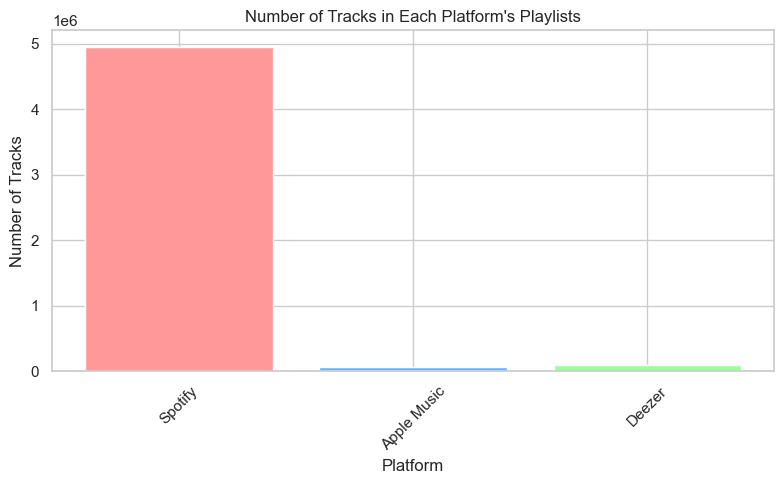

In [39]:
# Rename the columns for clarity
df.rename(columns={
    'in_spotify_playlists': 'Spotify',
    'in_apple_playlists': 'Apple Music',
    'in_deezer_playlists': 'Deezer'
}, inplace=True)

# Define the new columns for the platforms
platforms = ['Spotify', 'Apple Music', 'Deezer']

# Count the number of tracks in each platform's playlists
track_counts = df[platforms].sum()

# Print the track counts for each platform
print(track_counts)

# Create a bar graph to visualize the number of tracks in each platform's playlists
plt.figure(figsize=(8, 5))
# Use pastel colors for the bars
plt.bar(track_counts.index, track_counts.values, color=['#ff9999', '#66b3ff', '#99ff99'])  # Pastel colors
plt.title("Number of Tracks in Each Platform's Playlists")
plt.xlabel('Platform')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Advanced Analysis

### Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

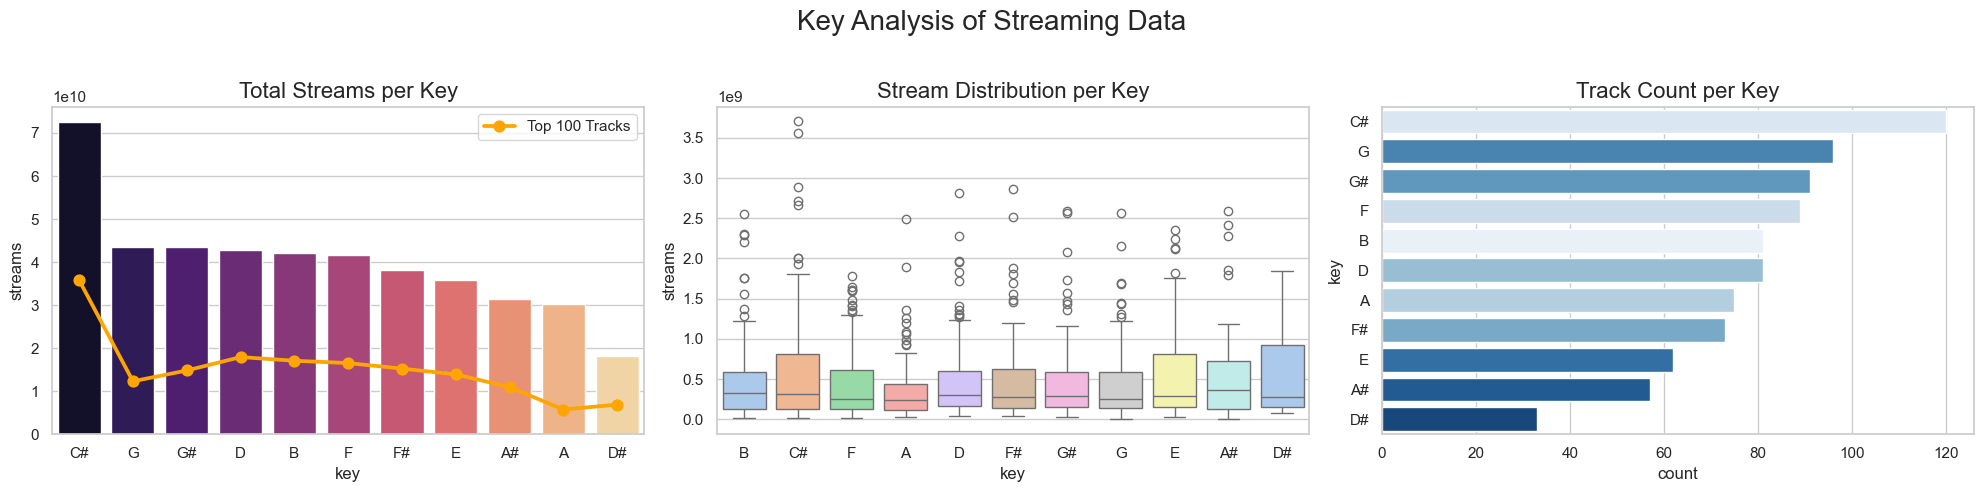

In [42]:
# Set up the figure and axes
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Total streams per key
total_streams = df.groupby('key')['streams'].sum().reset_index().sort_values('streams', ascending=False)
sns.barplot(data=total_streams, x='key', y='streams', ax=ax[0], palette='magma', hue='key', legend=False)

# Top 100 tracks by streams
top_tracks = df.sort_values('streams', ascending=False).head(100)
top_streams = top_tracks.groupby('key')['streams'].sum().reset_index().sort_values('streams', ascending=False)
sns.pointplot(data=top_streams, x='key', y='streams', color='orange', label='Top 100 Tracks', ax=ax[0])
ax[0].legend()
ax[0].set_title('Total Streams per Key', fontsize=16)

# Stream distribution per key
sns.boxplot(data=df, x='key', y='streams', ax=ax[1], palette='pastel', hue='key', legend=False)
ax[1].set_title('Stream Distribution per Key', fontsize=16)

# Track count per key
sns.countplot(data=df, y='key', order=df['key'].value_counts().index, palette='Blues', ax=ax[2], hue='key', legend=False)
ax[2].set_title('Track Count per Key', fontsize=16)

# Overall title
plt.suptitle('Key Analysis of Streaming Data', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

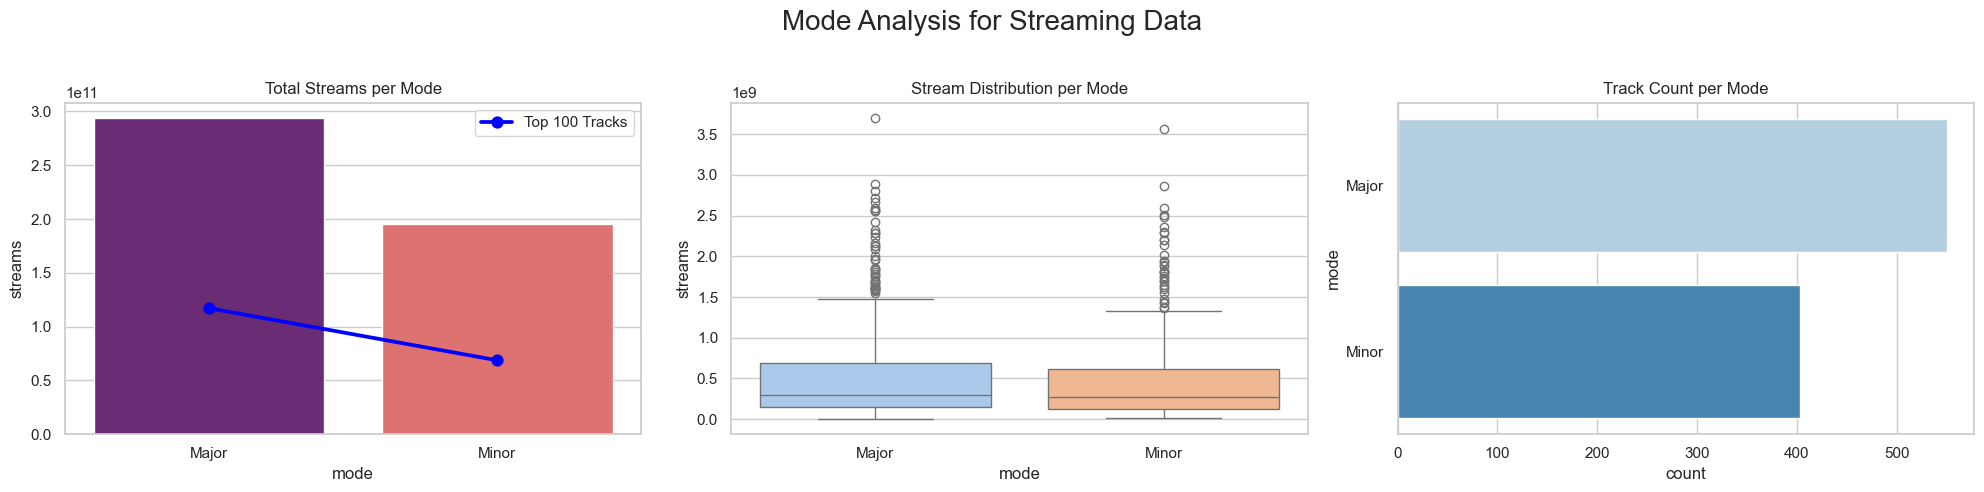

In [43]:
# Set up the figure and axes
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Total streams per mode
x = df.groupby('mode')['streams'].sum().reset_index().sort_values('streams', ascending=False)
sns.barplot(data=x, y='streams', x='mode', ax=ax[0], hue='mode', palette='magma', legend=False)

# Top 100 tracks by streams per mode
y = df.sort_values('streams', ascending=False).head(100).groupby('mode')['streams'].sum().reset_index().sort_values('streams', ascending=False)
sns.pointplot(data=y, y='streams', x='mode', color='blue', label='Top 100 Tracks', ax=ax[0])
ax[0].legend()
ax[0].title.set_text('Total Streams per Mode')

# Stream distribution per mode
sns.boxplot(data=df, x='mode', y='streams', ax=ax[1], hue='mode', palette='pastel', legend=False)
ax[1].title.set_text("Stream Distribution per Mode")

# Track count per mode
sns.countplot(data=df, y='mode', order=df['mode'].value_counts().index, ax=ax[2], hue='mode', palette='Blues', legend=False)
ax[2].title.set_text("Track Count per Mode")

# Overall title
plt.suptitle('Mode Analysis for Streaming Data', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

### Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

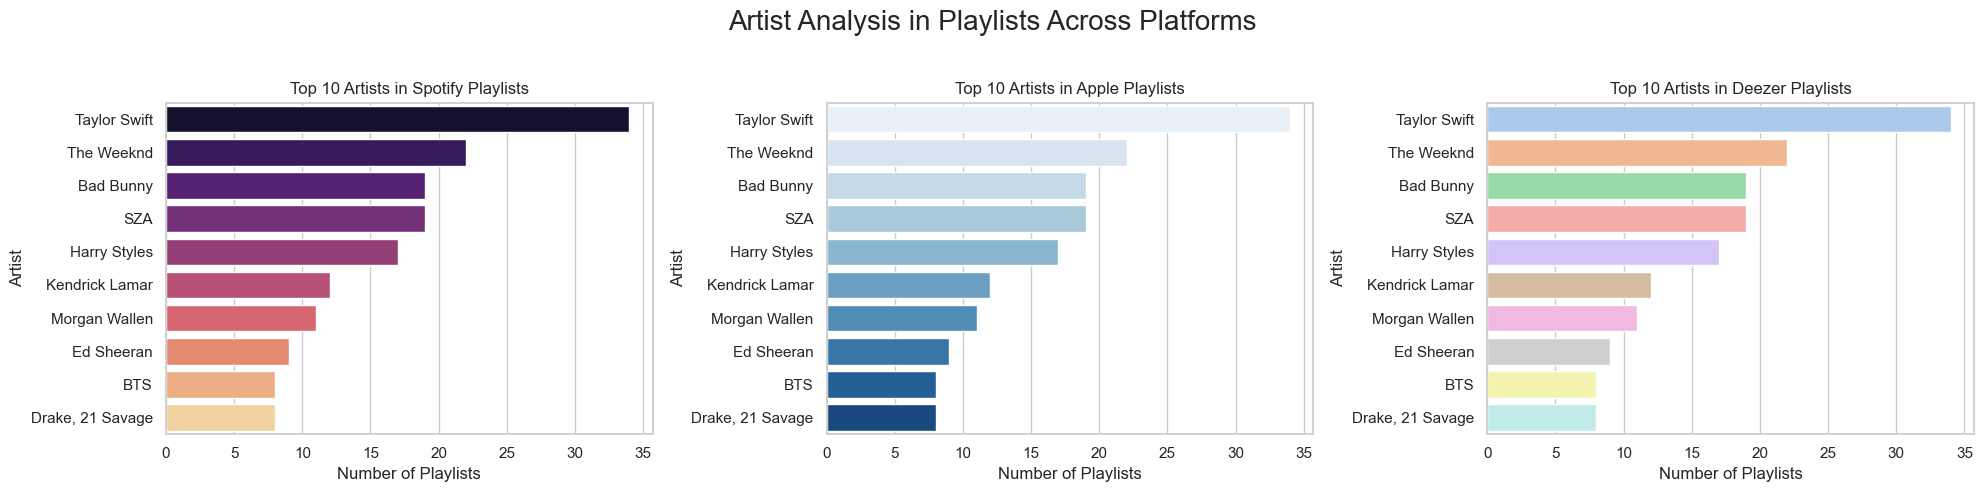

In [45]:
# Count the occurrences of each artist in Spotify, Apple, and Deezer playlists
spotify_artist_counts = df['artist(s)_name'].value_counts().reset_index()
spotify_artist_counts.columns = ['artist', 'spotify_count']

apple_artist_counts = df['artist(s)_name'].value_counts().reset_index()
apple_artist_counts.columns = ['artist', 'apple_count']

deezer_artist_counts = df['artist(s)_name'].value_counts().reset_index()
deezer_artist_counts.columns = ['artist', 'deezer_count']

# Merge the counts into a single DataFrame
artist_counts = spotify_artist_counts.merge(apple_artist_counts, on='artist', how='outer')
artist_counts = artist_counts.merge(deezer_artist_counts, on='artist', how='outer')

# Fill NaN values with 0
artist_counts.fillna(0, inplace=True)

# Set up the figure and axes
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Bar plot for the most frequently appearing artists in Spotify playlists
sns.barplot(data=artist_counts.nlargest(10, 'spotify_count'), x='spotify_count', y='artist', ax=ax[0], hue='artist', palette='magma', legend=False)
ax[0].title.set_text('Top 10 Artists in Spotify Playlists')
ax[0].set_xlabel('Number of Playlists')
ax[0].set_ylabel('Artist')

# Bar plot for the most frequently appearing artists in Apple playlists
sns.barplot(data=artist_counts.nlargest(10, 'apple_count'), x='apple_count', y='artist', ax=ax[1], hue='artist', palette='Blues', legend=False)
ax[1].title.set_text('Top 10 Artists in Apple Playlists')
ax[1].set_xlabel('Number of Playlists')
ax[1].set_ylabel('Artist')

# Bar plot for the most frequently appearing artists in Deezer playlists
sns.barplot(data=artist_counts.nlargest(10, 'deezer_count'), x='deezer_count', y='artist', ax=ax[2], hue='artist', palette='pastel', legend=False)
ax[2].title.set_text('Top 10 Artists in Deezer Playlists')
ax[2].set_xlabel('Number of Playlists')
ax[2].set_ylabel('Artist')

# Overall title
plt.suptitle('Artist Analysis in Playlists Across Platforms', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()